#### Project : Customer Churn

Problem Statement:

In [133]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [155]:
#loading  the dataset
df=pd.read_csv('customer_churn.csv')
df.head(5)

customer_5=df.iloc[:,4]
customer_15=df.iloc[:,14]
senior_male_electronic=df[(df['gender']=='Male')&(df['PaymentMethod']=='Electronic check')]
customer_total_tenure=df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
two_mail_yes=df[(df['Contract']=='Two year')&(df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]
random=df.sample(n=333)
churn_count=df["Churn"].value_counts()


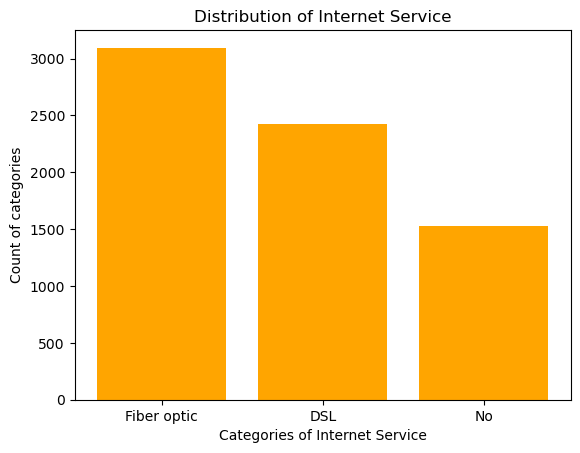

In [135]:
#Bar plot
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

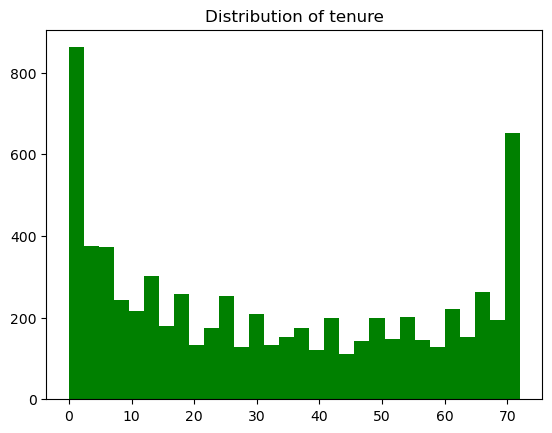

In [136]:
# Histogram
plt.hist(df['tenure'],bins=30,color='green')
plt.title('Distribution of tenure')
plt.show()

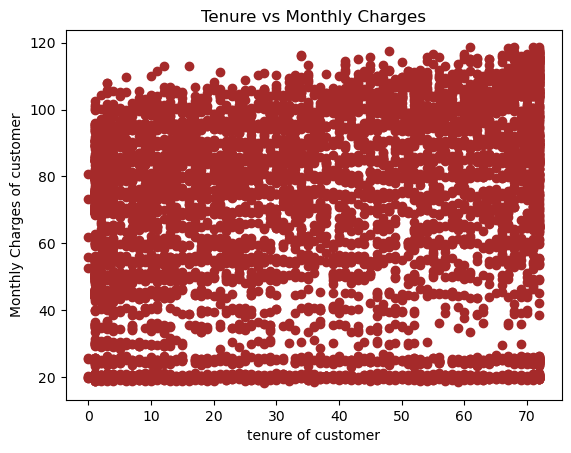

In [137]:
# scatter plot
plt.scatter(x=df['tenure'],y=df['MonthlyCharges'],color='brown')
plt.xlabel('tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

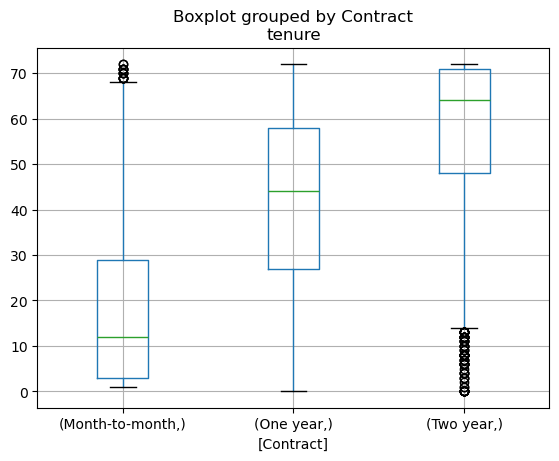

In [138]:
# boxplot
df.boxplot(column='tenure',by=['Contract'])
plt.show()

In [165]:
#linear Regression

x=pd.DataFrame(df['tenure'])
y=df['MonthlyCharges']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

mse=mean_squared_error(y_pred,y_test)
sqrt=np.sqrt(mse)

print(f"Mean square error : {mse}\nroot mean square error : {sqrt}")

Mean square error : 849.5795182886588
root mean square error : 29.147547380331314


In [173]:
# Logistic Regression

y=df['Churn']
x=pd.DataFrame(df['MonthlyCharges'])

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=33)

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

accuracy=accuracy_score(y_test,y_pred)

confusion=confusion_matrix(y_pred,y_test)

print(f"Accuracy:{accuracy}\nConfusion matrix : {confusion}")

Accuracy:0.7311435523114356
Confusion matrix : [[1803  663]
 [   0    0]]


In [175]:
# Decision Tree

y=df['Churn']
x=pd.DataFrame(df['tenure'])

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

accuracy=accuracy_score(y_test,y_pred)

confusion=confusion_matrix(y_pred,y_test)

print(f"Accuracy:{accuracy}\nConfusion matrix : {confusion}")

Accuracy:0.751596877217885
Confusion matrix : [[958 282]
 [ 68 101]]


In [177]:
# Random Forest

y=df['Churn']
x=pd.DataFrame(df['tenure'])

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

accuracy=accuracy_score(y_test,y_pred)

confusion=confusion_matrix(y_pred,y_test)

print(f"Accuracy:{accuracy}\nConfusion matrix : {confusion}")

Accuracy:0.7501183151916706
Confusion matrix : [[1443  424]
 [ 104  142]]
